<img src="https://i.imgur.com/6U6q5jQ.png"/>



<a target="_blank" href="https://colab.research.google.com/github/SocialAnalytics-StrategicIntelligence/SocialNet_analytics/blob/main/SocialNet_Analytics.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Mining Network data

We have networks available. Let's get some information out of them.

* This is the data about Peruvian elites:

In [2]:
#import wget
import networkx as nx
import os

GitLocation="https://github.com/SocialAnalytics-StrategicIntelligence/SocialNet_analytics/raw/main/graphFiles/"
URL1 = GitLocation+"EliteNet.graphml"

theFile1=os.path.join('graphFiles','EliteNet.graphml')


# if os.path.exists(theFile1):
#     os.remove(theFile1) # if exist, remove it directly
# wget.download(URL1, theFile1) # download it to the specific path.
eliNet=nx.read_graphml(theFile1)

* This is the data about international trading

In [3]:
URL2 = GitLocation+"trade_graph.graphml"

theFile2=os.path.join('graphFiles','trade_graph.graphml')


# if os.path.exists(theFile2):
#     os.remove(theFile2) 
# wget.download(URL2, theFile2)
tradeNet=nx.read_graphml(theFile2)

* I have also prepared a network from [this article](https://www.builtinseattle.com/2018/08/06/50-seattle-tech-twitter-accounts-to-follow). There, we have a list of people considered key technological players in Seattle. The article gives their Twitter accounts, so I created a network using those accounts, the links meaning _someone follows someone on Twitter_.

In [4]:
from IPython.display import IFrame
IFrame('https://docs.google.com/spreadsheets/d/e/2PACX-1vQaaNQb2frjnlt0fPSBQhp5tNydB0a9ibp98sblBn6OfvGd8vsx8cfHb4w8Cm_qC3EIeYFby_zNQBoK/pubhtml', 800, 350)

In [5]:
URL3 = GitLocation+ "seattleTop.xlsx"

import pandas as pd

# reading in Pandas
adjacency=pd.read_excel(URL3,   
                        index_col=0,  # la columna '0' guarda los nombres
                        sheet_name='adjacency') # la tabla tiene este nombre

# creating as directed network
topsNet=nx.from_pandas_adjacency(adjacency,create_using=nx.DiGraph)

The analytics can be done in two ways:
- At the network level
- At the node level

# Network Level measures

In [6]:
type(eliNet), type(tradeNet), type(topsNet)

(networkx.classes.graph.Graph,
 networkx.classes.graph.Graph,
 networkx.classes.digraph.DiGraph)

## Connectedness

In [7]:
nx.is_connected(eliNet), nx.is_connected(tradeNet)

(False, True)

In [8]:
nx.is_weakly_connected(topsNet), nx.is_strongly_connected(topsNet)

(True, False)

If the **EliteNet** is not connected, it has components:

In [9]:
# how many?
numComponents=nx.number_connected_components(eliNet)
numComponents

8

Directed neworks can be weakly connected (WK) or strongly conneced (SC). Figure 1 shows the SC-components in a directed net.
    
<figure>
<img src="https://github.com/SocialAnalytics-StrategicIntelligence/SocialNet_analytics/raw/main/picsForSession/strongly_connected.png" style="width:70%">
<figcaption align = "center"> Figura 1. Strongly coonected networks (directed). 
 </figcaption>
 <a href="https://medium.com/@jane.vdplas/https-medium-com-protium-digital-what-are-network-effects-4f1ec159b6">Source: Medium</a>
</figure>

How many strongly connected components in **topsNet**?

In [10]:
nx.number_strongly_connected_components(topsNet)

4

What nodes are in each component of _EliteNet_?:

In [11]:
for c in nx.connected_components(eliNet):
    print (c)

{'Bustamante', 'Bentin', 'Llosa Barber', 'Graña', 'Montori', 'Romero', 'Beoutis Ledesma', 'Piazza', 'Wiese', 'Wong Lu', 'Rizo Patron', 'Picaso', 'Brescia', 'Ferreyros', 'De La Puente', 'Sotomayor', 'Montero', 'Cilloniz', 'Moreyra', 'Benavides', 'Woodman Pollit', 'Raffo', 'Fort', 'Nicolini', 'Berckemeyer', 'Onrubia', 'Michell', 'Miro Quesada'}
{'Matos Escalada', 'Galsky', 'Batievsky Spack'}
{'Lucioni'}
{'Rodriguez Rodríguez'}
{'Custer'}
{'Ikeda'}
{'Cogorno'}
{'Arias Davila'}


We could the component label as an attribute:

In [12]:
componentAttr=dict()
for people,component in zip(nx.connected_components(eliNet),range(8)): #range to label with an INTEGER
    componentAttr.update({p:component for p in people} )
componentAttr

{'Bustamante': 0,
 'Bentin': 0,
 'Llosa Barber': 0,
 'Graña': 0,
 'Montori': 0,
 'Romero': 0,
 'Beoutis Ledesma': 0,
 'Piazza': 0,
 'Wiese': 0,
 'Wong Lu': 0,
 'Rizo Patron': 0,
 'Picaso': 0,
 'Brescia': 0,
 'Ferreyros': 0,
 'De La Puente': 0,
 'Sotomayor': 0,
 'Montero': 0,
 'Cilloniz': 0,
 'Moreyra': 0,
 'Benavides': 0,
 'Woodman Pollit': 0,
 'Raffo': 0,
 'Fort': 0,
 'Nicolini': 0,
 'Berckemeyer': 0,
 'Onrubia': 0,
 'Michell': 0,
 'Miro Quesada': 0,
 'Matos Escalada': 1,
 'Galsky': 1,
 'Batievsky Spack': 1,
 'Lucioni': 2,
 'Rodriguez Rodríguez': 3,
 'Custer': 4,
 'Ikeda': 5,
 'Cogorno': 6,
 'Arias Davila': 7}

We use the dictionary to add the attribute:

In [13]:
nx.set_node_attributes(eliNet, componentAttr,'component')

A visual representation follows:

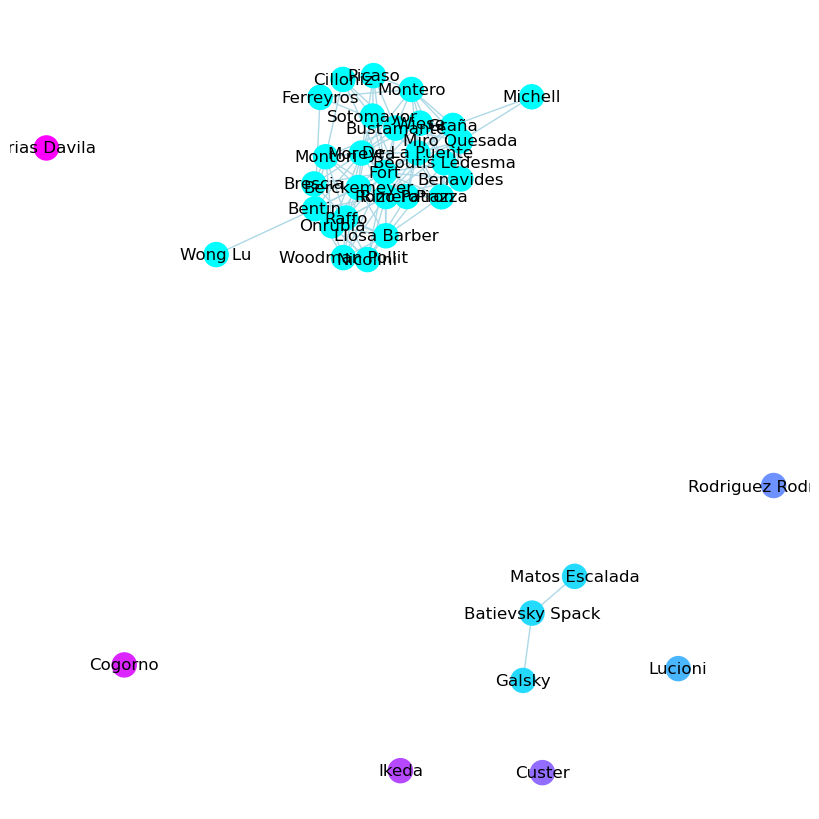

In [14]:
import matplotlib.pyplot as plt

pos=nx.spring_layout(eliNet, k=0.3) 
plt.figure(figsize=(8,8))
color_map = plt.get_cmap("cool")
valuesForColors=[n[1]['component'] for n in eliNet.nodes(data=True)]
nx.draw(eliNet,node_color=valuesForColors,cmap=color_map,with_labels=True,edge_color='lightblue',pos=pos)

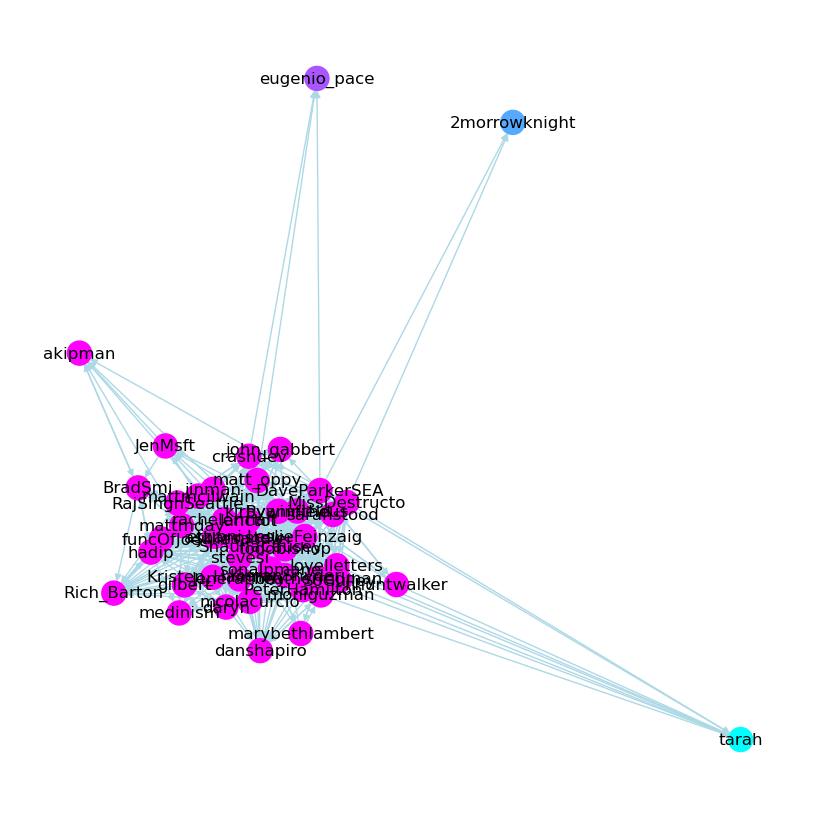

In [15]:
componentAttr=dict()
for people,component in zip(nx.strongly_connected_components(topsNet),range(5)): 
    componentAttr.update({p:component for p in people} )

nx.set_node_attributes(topsNet, componentAttr,'component')
pos=nx.spring_layout(topsNet, k=0.3) 
plt.figure(figsize=(8,8))
color_map = plt.get_cmap("cool")
valuesForColors=[n[1]['component'] for n in topsNet.nodes(data=True)]
nx.draw(topsNet,node_color=valuesForColors,cmap=color_map,with_labels=True,edge_color='lightblue',pos=pos)

### Giant component

As we do not have ONE connected network in _EliteNet_ but several components, we can pay attention to the **Giant Component**:

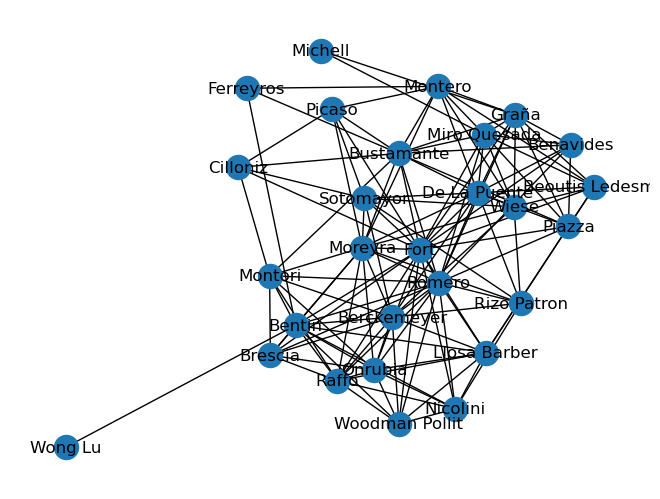

In [16]:
sorted_Components = sorted(nx.connected_components(eliNet), key=len, reverse=True)
eliNet_giant = eliNet.subgraph(sorted_Components[0])

## Let's take a look at the Giant Component:
nx.draw(eliNet_giant,with_labels=True)

## Basic summary for Networks:

- For EliteNet

In [17]:
# number of edges, and nodes
len(eliNet_giant.edges()),len(eliNet_giant.nodes())

(133, 28)

* For TradeNet

In [18]:
len(tradeNet.edges()),len(tradeNet.nodes())

(5080, 224)

* For topsNet

In [19]:
len(topsNet.edges()),len(topsNet.nodes())

(588, 46)

## Structure Exploration

### Density

**Density** let us know how far a network is from being 'complete'. The value ranges from 0 to 1, where 1 makes it a 'complete' network.

<figure>
<img src="https://github.com/SocialAnalytics-StrategicIntelligence/SocialNet_analytics/raw/main/picsForSession/density.png" style="width:70%">
<figcaption align = "center"> Figure 2. Density. 
 </figcaption>
 <a href="https://medium.com/@jane.vdplas/https-medium-com-protium-digital-what-are-network-effects-4f1ec159b6">Source: Medium</a>
</figure>



What can we learn from this?

In [20]:
nx.density(eliNet_giant)

0.35185185185185186

In [21]:
nx.density(tradeNet)

0.2033952594490711

In [22]:
nx.density(topsNet)

0.28405797101449276

### Distance

The **distance** is understood as the count of  _edges_ that sepate two nodes. Since two pair of nodes can have several distances, a **geodesic** is the shortest distance between them. The Figure 3 shows geodesics:

<figure>
<img src="https://github.com/SocialAnalytics-StrategicIntelligence/SocialNet_analytics/raw/main/picsForSession/geodesics.png" style="width:70%">
<figcaption align = "center"> Figure 3. Geodesics. 
 </figcaption>
 <a href="https://www.wolframphysics.org/technical-introduction/limiting-behavior-and-emergent-geometry/geodesics/" class="alert-link">Source: Wolframphysics</a>
</figure>

These are the geodesics for the _eliNet_giant_:


In [23]:
geodesics = dict(nx.all_pairs_shortest_path_length(eliNet_giant))
MatrixGeo = [[geodesics.get(n,{}).get(m)  for m in eliNet_giant.nodes] for n in eliNet_giant.nodes]
MatrixGeo_elite=pd.DataFrame(MatrixGeo,index=eliNet_giant.nodes, columns=eliNet_giant.nodes)

#here
MatrixGeo_elite

,Romero,Graña,Miro Quesada,Moreyra,Fort,De La Puente,Wiese,Onrubia,Brescia,Nicolini,...,Berckemeyer,Llosa Barber,Beoutis Ledesma,Rizo Patron,Montori,Sotomayor,Cilloniz,Ferreyros,Michell,Wong Lu
Romero,0,1,1,1,1,1,2,1,1,1,...,1,1,2,1,1,2,2,2,2,2
Graña,1,0,1,2,1,1,1,2,2,2,...,2,2,1,2,2,2,2,2,1,3
Miro Quesada,1,1,0,2,1,1,1,2,2,2,...,2,2,1,2,2,2,2,2,1,3
Moreyra,1,2,2,0,1,1,1,1,1,2,...,1,2,2,1,1,1,2,2,3,2
Fort,1,1,1,1,0,1,2,1,1,1,...,2,1,1,2,2,1,1,2,2,2
De La Puente,1,1,1,1,1,0,1,2,2,2,...,1,2,1,1,2,1,2,2,2,3
Wiese,2,1,1,1,2,1,0,2,2,2,...,1,2,1,1,2,1,2,2,2,3
Onrubia,1,2,2,1,1,2,2,0,1,1,...,1,1,2,2,1,2,2,2,3,2
Brescia,1,2,2,1,1,2,2,1,0,2,...,1,2,2,2,1,2,2,2,3,2
Nicolini,1,2,2,2,1,2,2,1,2,0,...,2,1,2,1,2,2,2,2,3,2


From the matrix, we can count the frequency of geodesics:

In [24]:
import numpy as np

pd.DataFrame(np.unique(MatrixGeo_elite.values, return_counts=True),index=['geodesic_size','freq']).T.set_index('geodesic_size')

,freq
geodesic_size,
0,28
1,266
2,422
3,66
4,2


The zeros represent the count of pairs (a,a).

Let me get the counts for _tradeNet_:

In [25]:
geodesics = dict(nx.all_pairs_shortest_path_length(tradeNet))
MatrixGeo = [[geodesics.get(n,{}).get(m)  for m in tradeNet.nodes] for n in tradeNet.nodes]
MatrixGeo_trade=pd.DataFrame(MatrixGeo,index=tradeNet.nodes, columns=tradeNet.nodes)

#here
pd.DataFrame(np.unique(MatrixGeo_trade.values, return_counts=True),index=['geodesic_size','freq']).T.set_index('geodesic_size')

,freq
geodesic_size,
0,224
1,10160
2,21124
3,13448
4,3986
5,1214
6,20


Let me get the counts for _topsNet_:

In [26]:
geodesics = dict(nx.all_pairs_shortest_path_length(topsNet))
MatrixGeo = [[geodesics.get(n,{}).get(m)  for m in topsNet.nodes] for n in topsNet.nodes]
MatrixGeo_tops=pd.DataFrame(MatrixGeo,index=topsNet.nodes, columns=topsNet.nodes)

#here
pd.DataFrame(np.unique(MatrixGeo_tops.values, return_counts=True),index=['geodesic_size','freq']).T.set_index('geodesic_size')

,freq
geodesic_size,
0.0,46.0
1.0,588.0
2.0,1158.0
3.0,182.0
4.0,7.0
NaN,135.0


Notice the missing geodesics tells there are absences of a paths between several pairs of nodes.

A key concept derived for the geodesic size exploration is **the diameter**: the worst case escenario for number of steps for a node to contact another one (only for connected component in undirected nets, or SCC in directed case). This is also known as _maximum eccentricity_. 

<figure>
<img src="https://github.com/SocialAnalytics-StrategicIntelligence/SocialNet_analytics/raw/main/picsForSession/diameter.png" style="width:70%">
<figcaption align = "center"> Figure 4. Diameter. 
 </figcaption>
 Source: Author.
</figure>



In [27]:
nx.diameter(eliNet_giant)

4

In [28]:
nx.diameter(tradeNet)

6

In [29]:
# nx.strongly_connected_components gives nodes
# sorted /key=len /reverse=True orders components by size
# topsNet.subgraph builds the net
nx.diameter(topsNet.subgraph(sorted(nx.strongly_connected_components(topsNet), key=len, reverse=True)[0]))

4

**Average shortest path** is the average of every geodesic in the network.

In [30]:
nx.average_shortest_path_length(eliNet_giant)

1.7407407407407407

In [31]:
nx.average_shortest_path_length(tradeNet)

2.299927930813581

In [32]:
# only for the SC-component
nx.average_shortest_path_length(topsNet.subgraph(sorted(nx.strongly_connected_components(topsNet), key=len, reverse=True)[0]))

1.7652270210409746

A scale-free network is one where most of his nodes have few connections, then we have other structures could be:

* **Random networks** have *small shortest path* and *small clustering coefficient*
* **Small world networks** have *small shortest path* and *high clustering coefficient*
* **Regular networks** have *high shortest path* and *high clustering coefficient*
<center><img src="https://github.com/EvansDataScience/CTforGA_Networks/raw/main/networkTypes.jpeg" width="500"></center>

### Reachability

From the matrix of geodesics we can get the  **reachability matrix**, which tells you if there is a conection between two nodes:

In [33]:
MatrixReach_elite=(MatrixGeo_elite>0).replace({True:1,False:0})
MatrixReach_elite

/var/folders/2n/bkfhfqq16r78g3hf7pdj56y40000gn/T/ipykernel_41832/1395983439.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MatrixReach_elite=(MatrixGeo_elite>0).replace({True:1,False:0})


,Romero,Graña,Miro Quesada,Moreyra,Fort,De La Puente,Wiese,Onrubia,Brescia,Nicolini,...,Berckemeyer,Llosa Barber,Beoutis Ledesma,Rizo Patron,Montori,Sotomayor,Cilloniz,Ferreyros,Michell,Wong Lu
Romero,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Graña,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Miro Quesada,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Moreyra,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Fort,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
De La Puente,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Wiese,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Onrubia,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
Brescia,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
Nicolini,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1


This matrix helps us compute the **connectedness** level:

In [34]:
nNodes=len(eliNet_giant.nodes)
MatrixReach_elite.sum().sum()/(nNodes*(nNodes-1))

1.0

In [35]:
MatrixReach_tops=(MatrixGeo_tops>0).replace({True:1,False:0})

nNodes=len(topsNet.nodes)
MatrixReach_tops.sum().sum()/(nNodes*(nNodes-1))

/var/folders/2n/bkfhfqq16r78g3hf7pdj56y40000gn/T/ipykernel_41832/3245188219.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MatrixReach_tops=(MatrixGeo_tops>0).replace({True:1,False:0})


0.9347826086956522

If we have a directed graph, here _topsNet_, we can compute reciprocity:

In [36]:
nx.overall_reciprocity(topsNet)

0.6632653061224489

In [37]:
# by node
pd.DataFrame.from_dict(nx.reciprocity(topsNet,nodes=topsNet.nodes),orient='index').sort_values(0,ascending=False)

,0
LeslieFeinzaig,0.941176
john_gabbert,0.923077
ShaunaCausey,0.901961
toddbishop,0.828571
daryn,0.823529
MissDestructo,0.820513
juliesandler,0.807692
rachelerman,0.800000
heatherredman,0.800000
etzioni,0.800000


Density y Reachability are related but not synonyms, as we can see in Figure 5.

<figure>
<img src="https://github.com/SocialAnalytics-StrategicIntelligence/SocialNet_analytics/raw/main/picsForSession/reachability-and-density.png" style="width:70%">
<figcaption align = "center"> Figura 5. Reachability versus Density. 
 </figcaption>
 <a href="https://www.researchgate.net/publication/42763973_Toward_a_Network_Perspective_of_the_Study_of_Resilience_in_Social-Ecological_Systems">Fuente: Ecology and Society</a>
</figure>

## Exploration of network communities

* **Average clustering coefficient**: is the average of the local clustering coefficients of the nodes. If all the neighbors of every node are connected among one another, you get 1; if none of them are connected you get zero. 

<figure>
<img src="https://github.com/SocialAnalytics-StrategicIntelligence/SocialNet_analytics/raw/main/picsForSession/LocalClustCoeff.png" style="width:70%">
<figcaption align = "center"> Figure 6. Average clustering coefficient. 
 </figcaption>
 <a href="https://www.researchgate.net/publication/42763973_Toward_a_Network_Perspective_of_the_Study_of_Resilience_in_Social-Ecological_Systems">Source: Ecology and Society</a>
</figure>


In [38]:
# count_zeros=False -> to make results compatible with R!
nx.average_clustering(eliNet_giant,count_zeros=False)

0.6537018696117423

In [39]:
nx.average_clustering(tradeNet,count_zeros=False)

0.8091184770981618

In [40]:
nx.average_clustering(topsNet,count_zeros=False)

0.5705280020639293

* **Transitivity**: Tendency of local clustering.

In [41]:
# Probability  that two business men with a common business friend, are also friends.
nx.transitivity(eliNet_giant)

0.5829694323144105

In [42]:
# Probability that two countries with a common trade partner, are also partners.

nx.transitivity(tradeNet)

0.6997204082237525

In [43]:
# Probability that two tech guys with a common colleague, are also colleagues.
nx.transitivity(topsNet)

0.4351851851851852

* **Assortativity (degree)**: it is a measure to see if nodes are connecting to other nodes similar in degree.  Closer to 1 means higher assortativity, closer to -1 diassortativity; while 0 is no assortitivity.

In [44]:
nx.degree_assortativity_coefficient(eliNet_giant)

-0.12086710760602014

In [45]:
nx.degree_assortativity_coefficient(tradeNet)

0.13597674389468284

In [46]:
nx.degree_assortativity_coefficient(topsNet)

-0.2620402575553175

You can also compute assortativity using an attribute of interest:

In [47]:
nx.attribute_assortativity_coefficient(eliNet_giant,'multi') # positive if tend to connect with same nationality.

-0.07258064516129017

In [49]:
nx.attribute_assortativity_coefficient(topsNet,'sex') # positive if tend to connect with same sex.

nan

A **clique** can be understood a community of nodes where all of them are connected to one another.

* How many cliques do we have?

In [50]:
len(list(nx.enumerate_all_cliques(eliNet_giant)))

1074

In [51]:
all=nx.enumerate_all_cliques(tradeNet)

In [52]:
all # [a for a in all}

<generator object enumerate_all_cliques at 0x10ff578b0>

In [53]:
#len(list(nx.enumerate_all_cliques(topsNet)))
len(list(nx.find_cliques_recursive(topsNet)))

153

If a clique in the network can not be bigger is you add another node, then you have a **maximal clique**.

<center><img src="https://github.com/EvansDataScience/CTforGA_Networks/raw/main/cliqueMaximal.png" width="500"></center>

* How many maximal cliques are there in this network?

In [54]:
sum(1 for _ in nx.find_cliques(eliNet_giant))

28

In [55]:
sum(1 for _ in nx.find_cliques(tradeNet))

123

In [56]:
sum(1 for _ in nx.find_cliques(topsNet))

NetworkXNotImplemented: not implemented for directed type

This is how you see every maximal clique:

In [57]:
for a in nx.find_cliques(eliNet_giant):
    print (a)

['Wiese', 'De La Puente', 'Sotomayor', 'Rizo Patron', 'Berckemeyer', 'Moreyra']
['Wiese', 'De La Puente', 'Montero', 'Graña', 'Miro Quesada', 'Beoutis Ledesma']
['Wiese', 'De La Puente', 'Montero', 'Moreyra']
['Fort', 'Sotomayor', 'Picaso', 'Cilloniz']
['Fort', 'Sotomayor', 'Picaso', 'Moreyra']
['Fort', 'Sotomayor', 'De La Puente', 'Moreyra']
['Fort', 'Romero', 'Benavides', 'Bustamante', 'Graña', 'Miro Quesada', 'De La Puente', 'Piazza']
['Fort', 'Romero', 'Raffo', 'Bentin', 'Onrubia', 'Woodman Pollit', 'Nicolini', 'Llosa Barber']
['Fort', 'Romero', 'Raffo', 'Bentin', 'Onrubia', 'Brescia', 'Moreyra']
['Fort', 'Romero', 'Bustamante', 'Moreyra', 'De La Puente']
['Fort', 'Romero', 'Piazza', 'Llosa Barber']
['Fort', 'Picaso', 'Bustamante', 'Cilloniz']
['Fort', 'Picaso', 'Bustamante', 'Moreyra']
['Fort', 'Beoutis Ledesma', 'Piazza', 'Miro Quesada', 'Graña', 'De La Puente']
['Fort', 'Beoutis Ledesma', 'Piazza', 'Llosa Barber']
['Montero', 'Bustamante', 'Ferreyros']
['Montero', 'Bustamante', 

You can find the size of the _maximum clique_, largest clique in the graph, like this:

In [58]:
max(len(c) for c in nx.find_cliques(eliNet_giant))

8

In [59]:
max(len(c) for c in nx.find_cliques(tradeNet))

51

In [60]:
max(len(c) for c in nx.find_cliques(topsNet))

NetworkXNotImplemented: not implemented for directed type

You can see each maximum clique like this:

In [61]:
[c for c in nx.find_cliques(eliNet_giant) if len(c) == max(len(c) for c in nx.find_cliques(eliNet_giant))]

[['Fort',
  'Romero',
  'Benavides',
  'Bustamante',
  'Graña',
  'Miro Quesada',
  'De La Puente',
  'Piazza'],
 ['Fort',
  'Romero',
  'Raffo',
  'Bentin',
  'Onrubia',
  'Woodman Pollit',
  'Nicolini',
  'Llosa Barber'],
 ['Berckemeyer',
  'Romero',
  'Raffo',
  'Bentin',
  'Onrubia',
  'Brescia',
  'Montori',
  'Moreyra']]

If a network presents cliques makes you suspect that there can be **communities**.

This is a huge field of research, let me me show you one of the algorithms known as the [_Louvain method_](https://perso.uclouvain.be/vincent.blondel/research/louvain.html).

This algorithm can be installed using **pip install python-louvain**, and import it using **community**.


In [69]:
import community 
parts = community.best_partition(eliNet_giant)
parts

{'Romero': 2,
 'Graña': 0,
 'Miro Quesada': 0,
 'Moreyra': 1,
 'Fort': 0,
 'De La Puente': 0,
 'Wiese': 1,
 'Onrubia': 2,
 'Brescia': 2,
 'Nicolini': 2,
 'Montero': 0,
 'Picaso': 1,
 'Bentin': 2,
 'Benavides': 0,
 'Bustamante': 0,
 'Woodman Pollit': 2,
 'Raffo': 2,
 'Piazza': 0,
 'Berckemeyer': 2,
 'Llosa Barber': 2,
 'Beoutis Ledesma': 0,
 'Rizo Patron': 1,
 'Montori': 2,
 'Sotomayor': 1,
 'Cilloniz': 1,
 'Ferreyros': 0,
 'Michell': 0,
 'Wong Lu': 2}

In [82]:
from collections import ChainMap

data = dict(ChainMap(*[{k:x for k in y} for x,y in zip(range(len(nx.community.louvain_communities(eliNet_giant, seed=123))),
                                 nx.community.louvain_communities(eliNet_giant, seed=123))]))
data

{'Sotomayor': 2,
 'Fort': 2,
 'Rizo Patron': 2,
 'Picaso': 2,
 'Cilloniz': 2,
 'Moreyra': 2,
 'Woodman Pollit': 1,
 'Wong Lu': 1,
 'Raffo': 1,
 'Nicolini': 1,
 'Bentin': 1,
 'Berckemeyer': 1,
 'Llosa Barber': 1,
 'Brescia': 1,
 'Onrubia': 1,
 'Montori': 1,
 'Romero': 1,
 'Benavides': 0,
 'Wiese': 0,
 'Montero': 0,
 'Bustamante': 0,
 'Ferreyros': 0,
 'Graña': 0,
 'Michell': 0,
 'Miro Quesada': 0,
 'Beoutis Ledesma': 0,
 'De La Puente': 0,
 'Piazza': 0}

You can add that value as an attribute:

In [ ]:
nx.set_node_attributes(eliNet_giant, parts,'community')

Now plot this attribute:

In [ ]:
pos=nx.spring_layout(eliNet_giant, k=0.2) 
plt.figure(figsize=(8,8))
color_map = plt.get_cmap("cool")
valuesForColors=[n[1]['community'] for n in eliNet_giant.nodes(data=True)]
nx.draw(eliNet_giant,node_color=valuesForColors,cmap=color_map,with_labels=True,edge_color='lightblue')

Let's turn our attention to the nodes and their roles in the network.

<a id='part23'></a>

## Exploration of network actors

In [ ]:
# Computing centrality measures:
degr=nx.degree_centrality(eliNet_giant)  # based on connections count
clos=nx.closeness_centrality(eliNet_giant) # "speed" to access the rest
betw=nx.betweenness_centrality(eliNet_giant,normalized=True) # "control flow" among the network nodes
eige=nx.eigenvector_centrality(eliNet_giant) # central nodes connected to well connected nodes 

In [ ]:
# what do we have?
degr,clos,betw,eige

Let's save thosoe dicts as attributes:

In [ ]:
nx.set_node_attributes(eliNet_giant, degr,'degree')
nx.set_node_attributes(eliNet_giant, clos,'closeness')
nx.set_node_attributes(eliNet_giant, betw,'betweenness')
nx.set_node_attributes(eliNet_giant, eige,'eigenvector')

In [ ]:
eliNet_giant.nodes.data()

In [ ]:
[i for i in eliNet_giant.nodes(data=True)]

In [ ]:
import pandas as pd
eliteNodes_DF=pd.DataFrame([i[1] for i in eliNet_giant.nodes(data=True)], index=[i[0] for i in eliNet_giant.nodes(data=True)])
eliteNodes_DF

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(eliteNodes_DF.betweenness, eliteNodes_DF.closeness,s=(eliteNodes_DF.degree+1.3)**10,
           c=eliteNodes_DF.eigenvector,
           cmap=plt.get_cmap('YlOrRd'), alpha=0.6)

valsForAnnotate=zip(eliteNodes_DF.index,eliteNodes_DF.betweenness,eliteNodes_DF.closeness)
for name,coordX,coordY in valsForAnnotate:
    ax.annotate(name, (coordX,coordY),alpha=0.5)
    
plt.title("scatterplot (size for degree of node, color for eigenvalue)")
plt.xlabel("betweenness")
plt.ylabel("closeness")
plt.show()

### Egonet

The node with the highest degree could be considered a _hub_ in the network:

In [ ]:
# degr is a dictionary:
max(degr.keys(), key=(lambda k: degr[k]))

# or you can try:
#eliteNodes_DF['degree'].idxmax()

We can plot the neighbors of the hub, _its ego network_:

In [ ]:
# Determine the hub name:
HubNode=max(degr.keys(), key=(lambda k: degr[k]))

# Get ego network of Hub
HubEgonet=nx.ego_graph(eliNet_giant,HubNode)

# prepare to plot:

## positions of the nodes
pos=nx.spring_layout(HubEgonet)

## plot whole ego network
nx.draw(HubEgonet,pos,node_color='b',node_size=800,with_labels=True, alpha=0.5,node_shape='^')

## make the hub salient
nx.draw_networkx_nodes(HubEgonet,pos,nodelist=[HubNode],node_size=2000,node_color='r')

plt.show()

### Coonectivity

Can this network be disconnected? 
If so, we can compute the minimum number of nodes that must be removed to disconnect the network (create at least two components:

In [ ]:
nx.node_connectivity(eliNet_giant)

Who is the sole node with the power to break the network?

In [ ]:
list(nx.articulation_points(eliNet_giant))

We can highlight the articulation node in the giant component:

In [ ]:
# saving the cut point
cutPoint=list(nx.articulation_points(eliNet_giant))

# positions for all the nodes
pos=nx.spring_layout(eliNet_giant,k=0.1)

# sizes for nodes
SALIENT, NORMAL=(2000,800)

# plot all nodes
nx.draw(eliNet_giant,pos,node_color='b',node_size=NORMAL,with_labels=True, alpha=0.5,node_shape='^')

# make the cut salient:
nx.draw_networkx_nodes(eliNet_giant,pos,nodelist=cutPoint,node_size=SALIENT,node_color='r')
plt.show()